<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
x = torch.randn(3, 4)                       # normal(0, 1)
z = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)

In [2]:
x

tensor([[ 2.4068,  0.5300, -0.5507, -0.8424],
        [-0.3643, -0.1124, -1.9463,  1.2017],
        [-0.1733, -1.0632,  0.7150, -1.2296]])

In [3]:
z

tensor([[1., 2.],
        [3., 4.]])

In [4]:
x.to('cuda')

tensor([[ 2.4068,  0.5300, -0.5507, -0.8424],
        [-0.3643, -0.1124, -1.9463,  1.2017],
        [-0.1733, -1.0632,  0.7150, -1.2296]], device='cuda:0')

In [5]:
import torch
A = torch.randn(3, 4)
B = torch.randn(4, 5)
x = torch.randn(4)

# Matriz × matriz   → (3,5)
C = A @ B                    # o torch.matmul(A, B)

# Matriz × vector   → (3,)
y = A @ x                    # o torch.mv(A, x)

# Vector × vector   → escalar
dot = x @ x                  # o torch.dot(x, x)

# Batched matmul: (batch, m, n) @ (batch, n, p) → (batch, m, p)
X = torch.randn(10, 3, 4)
Y = torch.randn(10, 4, 2)
Z = X @ Y                    # aplica matmul 10 veces

In [6]:
C

tensor([[-7.6379e-02, -1.5648e+00,  1.2613e+00, -1.4068e+00,  4.1572e-02],
        [-1.2702e+00, -3.3784e+00, -8.3857e-05, -2.9255e-01, -1.8153e+00],
        [ 4.7748e-01, -6.0943e-01, -1.6207e-01, -8.9953e-01,  1.0766e+00]])

In [7]:
y

tensor([-4.1766,  0.3152, -1.9214])

In [8]:
Z

tensor([[[ 2.1682, -0.7226],
         [-0.2844,  0.9405],
         [-2.3821, -1.0050]],

        [[-0.1344, -2.5525],
         [ 0.3161, -0.2514],
         [-0.3463,  0.9685]],

        [[ 2.8275,  0.2851],
         [ 0.7494,  0.4293],
         [-0.1939, -0.7963]],

        [[-2.6898,  3.3228],
         [-0.1525,  0.0674],
         [-0.1880,  0.1501]],

        [[ 2.3822,  0.9844],
         [-0.3562,  2.4936],
         [ 1.7194, -0.7827]],

        [[-1.0500,  0.8286],
         [-0.5011,  0.1083],
         [ 0.7643, -4.4513]],

        [[ 0.4243, -0.6843],
         [-2.2702,  4.5871],
         [ 2.5462,  0.1387]],

        [[ 1.4514, -0.0643],
         [ 1.4698,  0.6750],
         [ 2.0861,  1.8536]],

        [[ 0.4826, -1.0664],
         [ 1.5438, -2.1725],
         [ 0.6376,  0.1679]],

        [[-0.5858, -4.2626],
         [ 0.0833,  5.7697],
         [-1.7308, -4.4021]]])

In [9]:
a = x.cpu().numpy()       # Torch → NumPy  (copia cero)
b = torch.from_numpy(a)   # NumPy → Torch  (memoria compartida)

In [10]:
a

array([ 1.2744898 ,  1.1455884 , -2.533875  , -0.21034358], dtype=float32)

In [11]:
b

tensor([ 1.2745,  1.1456, -2.5339, -0.2103])

In [13]:
import torch
M = torch.randn(3, 4)        # shape (3,4)
v = torch.tensor([1., 2., 3., 4.])   # shape (4,)  ≡ (1,4)

R = M + v      # v se “estira” a (3,4)

In [15]:
M

tensor([[-0.3232, -1.0452, -0.3389,  1.5029],
        [ 0.9323, -0.1917, -0.8659,  0.9123],
        [ 0.2051, -0.9898,  0.0603,  1.0146]])

In [16]:
v

tensor([1., 2., 3., 4.])

In [14]:
R

tensor([[0.6768, 0.9548, 2.6611, 5.5029],
        [1.9323, 1.8083, 2.1341, 4.9123],
        [1.2051, 1.0102, 3.0603, 5.0146]])

In [12]:
import torch, torch.nn as nn
x = torch.randn(5, requires_grad=True)
w = torch.randn(5, requires_grad=True)

y = (x * w).sum()          # forward
y.backward()               # retroprop

print(x.grad)              # ∂y/∂x
print(w.grad)              # ∂y/∂w

tensor([0.8746, 0.4444, 2.4347, 2.1954, 0.0244])
tensor([-0.3217, -0.0519,  1.2955, -1.9811,  1.6939])


In [17]:
from sklearn.datasets import make_circles
import torch

X_np, y_np = make_circles(n_samples=500, factor=0.4, noise=0.1, random_state=42)
X = torch.tensor(X_np, dtype=torch.float32)   # (500, 2)
y = torch.tensor(y_np, dtype=torch.long)      # 0 ó 1

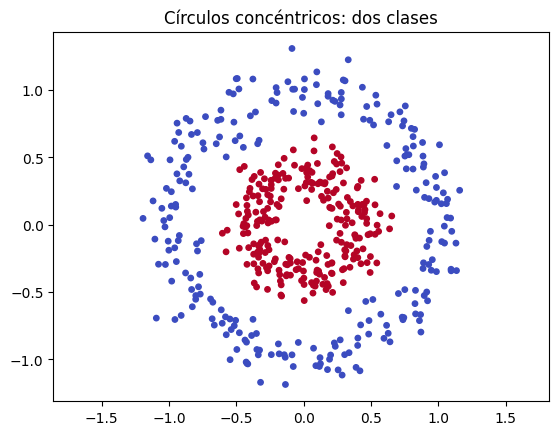

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_np[:,0], X_np[:,1], c=y_np, s=15, cmap="coolwarm")
plt.title("Círculos concéntricos: dos clases")
plt.axis("equal"); plt.show()

In [21]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, in_dim=2, hidden=16, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)   # logits
        )

    def forward(self, x):                # <-- una sola línea
        return self.net(x)

In [22]:
# ── Preparativos ───────────────────────────────────────────────
device = "cuda" if torch.cuda.is_available() else "cpu"
model     = SimpleNet().to(device)

criterion  = nn.CrossEntropyLoss()                        # CE = LogSoftmax + NLLLoss
optimizer  = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 500
loss_history = []
# ── Loop de entrenamiento ─────────────────────────────────────
for epoch in range(num_epochs):
    # 1️⃣ Forward pass
    logits = model(X.to(device))                # (batch, 2)

    # 2️⃣ Cálculo de pérdida
    loss = criterion(logits, y.to(device))      # y: etiquetas 0/1

    # 3️⃣ Backward pass
    optimizer.zero_grad()                       # limpia grad. previos
    loss.backward()                             # ∂loss/∂params

    # 4️⃣ Actualización de pesos
    optimizer.step()
    loss_history.append(loss.item())  # ← guarda la métrica

    # 5️⃣ Logging opcional
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f}")

Epoch 000 | Loss: 0.7252
Epoch 050 | Loss: 0.6808
Epoch 100 | Loss: 0.6477
Epoch 150 | Loss: 0.6118
Epoch 200 | Loss: 0.5697
Epoch 250 | Loss: 0.5233
Epoch 300 | Loss: 0.4776
Epoch 350 | Loss: 0.4348
Epoch 400 | Loss: 0.3946
Epoch 450 | Loss: 0.3569


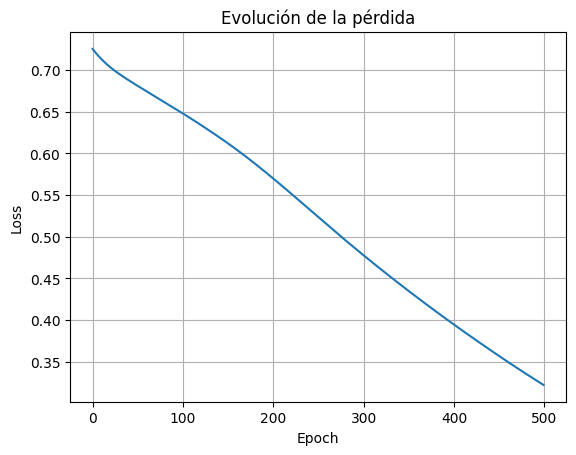

In [23]:
plt.plot(loss_history)                # loss_history: lista con loss por epoch
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución de la pérdida")
plt.grid(True)
plt.show()

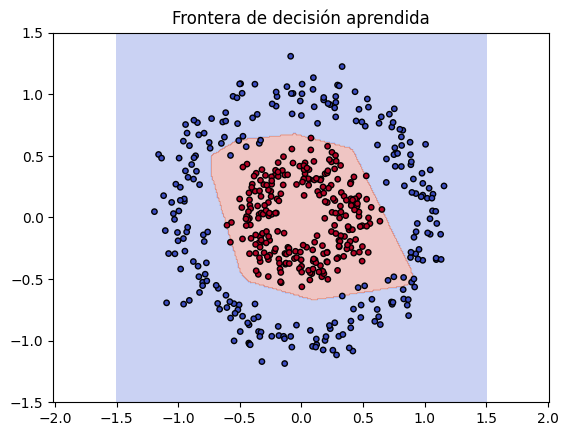

In [24]:
import numpy as np

# 1. Malla densa sobre el plano
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 300),
                     np.linspace(-1.5, 1.5, 300))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()],
                    dtype=torch.float32).to(device)

# 2. Predicción sin gradientes
with torch.no_grad():
    pred = model(grid).argmax(dim=1).cpu().reshape(xx.shape)

# 3. Gráfico
plt.contourf(xx, yy, pred, alpha=0.3, cmap="coolwarm")
plt.scatter(X_np[:,0], X_np[:,1], c=y_np,
            s=15, cmap="coolwarm", edgecolors="k")
plt.title("Frontera de decisión aprendida")
plt.axis("equal"); plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42, stratify=y_np)

# Tensores
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.long)
X_val   = torch.tensor(X_val_np,   dtype=torch.float32)
y_val   = torch.tensor(y_val_np,   dtype=torch.long)

In [26]:
train_loss_hist, val_loss_hist = [], []
val_acc_hist = []

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model  = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 500

for epoch in range(num_epochs):
    # ---- TRAIN ----
    model.train()                            # modo entrenamiento
    logits = model(X_train.to(device))
    loss   = criterion(logits, y_train.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_hist.append(loss.item())

    # ---- VALIDATION ----
    model.eval()                             # desactiva dropout/bn
    with torch.no_grad():
        val_logits = model(X_val.to(device))
        val_loss   = criterion(val_logits, y_val.to(device)).item()

        # Accuracy
        preds = val_logits.argmax(dim=1).cpu()
        val_acc = (preds == y_val).float().mean().item()

    val_loss_hist.append(val_loss)
    val_acc_hist.append(val_acc)

    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | "
              f"train loss {loss.item():.4f} | "
              f"val loss {val_loss:.4f} | "
              f"val acc {val_acc*100:.1f}%")

Epoch 000 | train loss 0.6906 | val loss 0.6885 | val acc 56.0%
Epoch 050 | train loss 0.6516 | val loss 0.6488 | val acc 60.0%
Epoch 100 | train loss 0.6055 | val loss 0.6036 | val acc 86.0%
Epoch 150 | train loss 0.5460 | val loss 0.5476 | val acc 94.0%
Epoch 200 | train loss 0.4779 | val loss 0.4831 | val acc 95.0%
Epoch 250 | train loss 0.4106 | val loss 0.4218 | val acc 95.0%
Epoch 300 | train loss 0.3502 | val loss 0.3679 | val acc 96.0%
Epoch 350 | train loss 0.2986 | val loss 0.3221 | val acc 97.0%
Epoch 400 | train loss 0.2555 | val loss 0.2831 | val acc 97.0%
Epoch 450 | train loss 0.2203 | val loss 0.2502 | val acc 97.0%


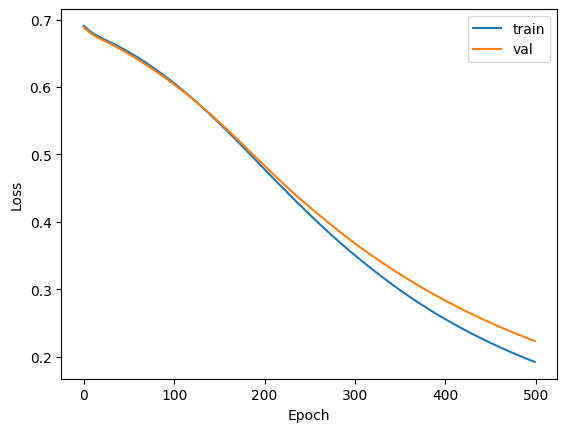

In [28]:
plt.plot(train_loss_hist, label="train")
plt.plot(val_loss_hist,   label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.show()

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model  = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1)
num_epochs = 500

In [32]:
best_val = float("inf"); patience = 20; bad_epochs = 0

for epoch in range(num_epochs):
    # ---- TRAIN ----
    model.train()                            # modo entrenamiento
    logits = model(X_train.to(device))
    loss   = criterion(logits, y_train.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_hist.append(loss.item())

    # ---- VALIDATION ----
    model.eval()                             # desactiva dropout/bn
    with torch.no_grad():
        val_logits = model(X_val.to(device))
        val_loss   = criterion(val_logits, y_val.to(device)).item()

        # Accuracy
        preds = val_logits.argmax(dim=1).cpu()
        val_acc = (preds == y_val).float().mean().item()

    val_loss_hist.append(val_loss)
    val_acc_hist.append(val_acc)

    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | "
              f"train loss {loss.item():.4f} | "
              f"val loss {val_loss:.4f} | "
              f"val acc {val_acc*100:.1f}%")
    if val_loss < best_val:
        best_val = val_loss
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        bad_epochs += 1
        if bad_epochs == patience:
            print("⏹️  Early stopping")
            break

Epoch 000 | train loss 0.0003 | val loss 0.0016 | val acc 100.0%
Epoch 050 | train loss 0.0003 | val loss 0.0015 | val acc 100.0%
Epoch 100 | train loss 0.0002 | val loss 0.0014 | val acc 100.0%
Epoch 150 | train loss 0.0002 | val loss 0.0013 | val acc 100.0%
Epoch 200 | train loss 0.0002 | val loss 0.0012 | val acc 100.0%
Epoch 250 | train loss 0.0002 | val loss 0.0011 | val acc 100.0%
Epoch 300 | train loss 0.0001 | val loss 0.0011 | val acc 100.0%
Epoch 350 | train loss 0.0001 | val loss 0.0010 | val acc 100.0%
Epoch 400 | train loss 0.0001 | val loss 0.0009 | val acc 100.0%
Epoch 450 | train loss 0.0001 | val loss 0.0009 | val acc 100.0%
